In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [35]:
X,Y = make_blobs(2000,2,[[0.1,0.1],[0.5,0.5],[1,1],[0,1.25],[1.5,0.25]],[0.1,0.2,0.2,0.3,0.5],random_state=208)

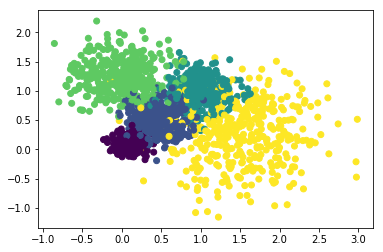

In [36]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

<b> K均值

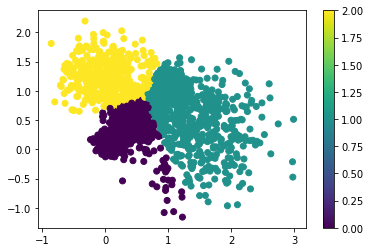

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=20)
y_pred = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.colorbar()
plt.show()

<b>评估

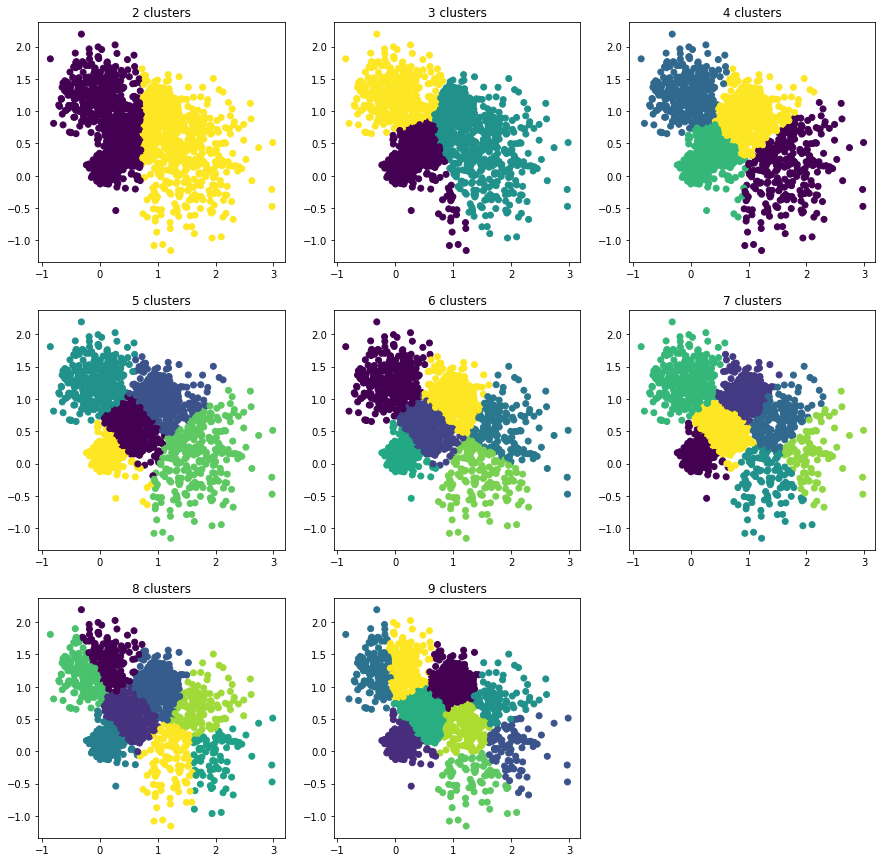

In [56]:
from sklearn import metrics
import matplotlib.pyplot as plt
import math

class_nums = range(2,10,1)
IMAGE_COLS = 3

test_count = len(class_nums)
image_rows = math.ceil(test_count/IMAGE_COLS)
scores_list = np.zeros((len(class_nums),))
plt.figure(figsize=(15,15))
for order,class_num in enumerate(class_nums):
    kmeans = KMeans(class_num,random_state=20)
    predict = kmeans.fit_predict(X)
    scores = metrics.calinski_harabaz_score(X,predict)
    scores_list[order] = scores
    plt.subplot(image_rows,IMAGE_COLS,order+1)
    plt.scatter(X[:, 0], X[:, 1], c=predict)
    plt.title("%d clusters"%class_num)
plt.show()

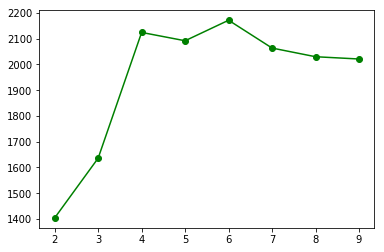

第1: 分6类，分数=2171.8547113715326
第2: 分4类，分数=2124.5309314088577
第3: 分5类，分数=2092.167635742266


In [57]:
plt.figure()
plt.plot(class_nums,scores_list,"go-")
plt.show()

max_indexes = np.argsort(-scores_list)[:3]
for order,index in enumerate(max_indexes):
    print("第{}: 分{}类，分数={}".format(order+1,class_nums[index],scores_list[index]))